## before fine-tuned

In [1]:
import pickle
import numpy as np
with open('structured_abstract_sections.pkl', 'rb') as f:
    normalized_sections = pickle.load(f)

normalized_sections

defaultdict(list,
            {'methods': ['a case report',
              'acquisition of evidence',
              'action',
              'actions',
              'activities',
              'admission findings',
              'ams subject classification',
              'analyses',
              'analysis',
              'analytical approach',
              'analytical techniques',
              'anatomy',
              'anesthesia',
              'animal',
              'animal or sample population',
              'animal population',
              'animal studied',
              'animal studies',
              'animal(s)',
              'animals',
              'animals and interventions',
              'animals and methods',
              'animals or sample population',
              'animals studied',
              'animals, materials and methods',
              'animals, methods',
              'approach',
              'approach and methods',
              'area covered',
      

In [14]:
from collections import defaultdict
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses
import pandas

fine_tuned_model = SentenceTransformer("all-MiniLM-L6-v2")

texts = []
y = np.array([])
label_names = {}
for i, sec in enumerate(normalized_sections.keys()) :
    label_names[i] = sec
    y = np.concatenate((y, np.array([i] * len(normalized_sections[sec]))))
    texts += normalized_sections[sec]

x = fine_tuned_model.encode(texts)
x


array([[-0.03128735,  0.120226  , -0.03695749, ...,  0.01507839,
         0.06955604,  0.07432684],
       [-0.06126447,  0.03566808, -0.0039926 , ...,  0.08632614,
         0.01843785, -0.00316342],
       [-0.04115909,  0.0086621 , -0.01718114, ..., -0.02191306,
        -0.03323134,  0.01197706],
       ...,
       [ 0.07783949,  0.04160243, -0.11846157, ..., -0.04176808,
        -0.01589942,  0.0857446 ],
       [ 0.0796954 ,  0.07521552, -0.10900633, ..., -0.01561132,
         0.0014665 ,  0.0577395 ],
       [-0.00854557,  0.05596095,  0.06314117, ...,  0.0117807 ,
         0.03961542,  0.03137922]], dtype=float32)

In [16]:
len(x)

3032

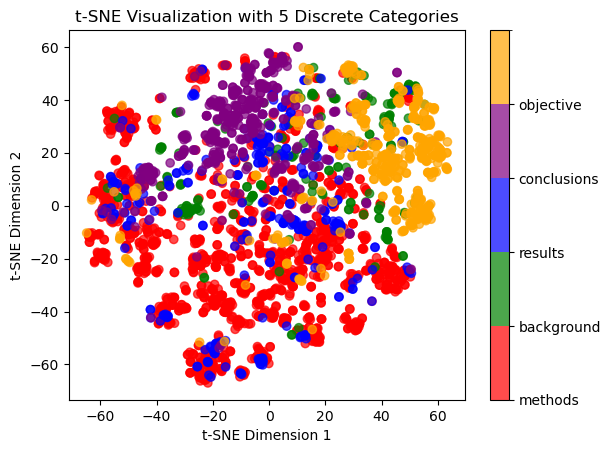

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap, BoundaryNorm

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(x)

cmap = ListedColormap(["red", "green", "blue", "purple", "orange"])  
norm = BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N) 

scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=cmap, norm=norm, alpha=0.7)

cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3, 4])
cbar.set_ticklabels([label_names[i] for i in range(5)])  # 设置类别名称

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization with 5 Discrete Categories")
plt.show()


## after fine-tuned

In [21]:
from collections import defaultdict
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses
import pandas

fine_tuned_model = SentenceTransformer("models/fine_tuned_sentence_bert_model_ContrastiveLoss")

texts = []
y = np.array([])
label_names = {}
for i, sec in enumerate(normalized_sections.keys()) :
    label_names[i] = sec
    y = np.concatenate((y, np.array([i] * len(normalized_sections[sec]))))
    texts += normalized_sections[sec]

x = fine_tuned_model.encode(texts)


In [22]:
len(x)

3032

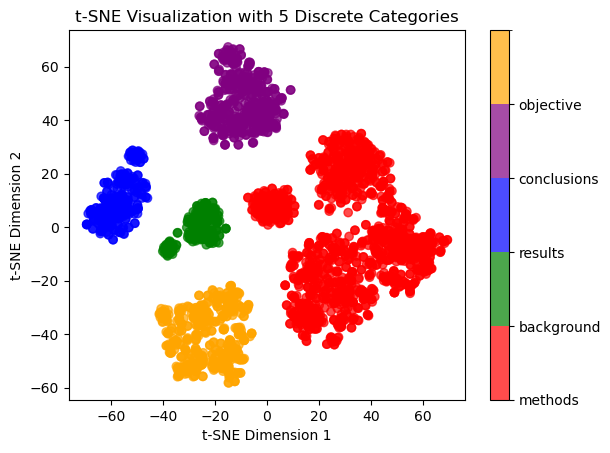

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap, BoundaryNorm

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(x)

cmap = ListedColormap(["red", "green", "blue", "purple", "orange"])  
norm = BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N) 

scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=cmap, norm=norm, alpha=0.7)

cbar = plt.colorbar(scatter, ticks=[0, 1, 2, 3, 4])
cbar.set_ticklabels([label_names[i] for i in range(5)])  # 设置类别名称

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization with 5 Discrete Categories")
plt.show()
